In [1]:
import proper
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
sys.path.append(os.environ['MEDIS_DIR'])
from Utils.plot_tools import view_datacube, quicklook_wf, quicklook_im

In [3]:
def simple_telescope(wavelength, gridsize):
    
    # Define entrance aperture diameter and other quantities
    d_objective = 5.0                        # objective diameter in meters
    fl_objective = 20.0 * d_objective          # objective focal length in meters
    fl_eyepiece = 0.021                        # eyepiece focal length
    fl_eye = 0.022                             # human eye focal length
    beam_ratio = 0.3                           # initial beam width/grid width

    # Define the wavefront
    wfo = proper.prop_begin(d_objective, wavelength, gridsize, beam_ratio)

    # Define a circular aperture
    proper.prop_circular_aperture(wfo, d_objective/2)

    # Define entrance
    proper.prop_define_entrance(wfo)

    # Define a lens
    proper.prop_lens(wfo, fl_objective, "objective")

    # Propagate the wavefront
    proper.prop_propagate(wfo, fl_objective+fl_eyepiece, "eyepiece")

    # Define another lens
    proper.prop_lens(wfo, fl_eyepiece, "eyepiece")

    exit_pupil_distance = fl_eyepiece / (1 - fl_eyepiece/(fl_objective+fl_eyepiece))
    proper.prop_propagate(wfo, exit_pupil_distance, "exit pupil at eye lens")

    proper.prop_lens(wfo, fl_eye, "eye")
    proper.prop_propagate(wfo, fl_eye, "retina")

    quicklook_wf(wfo)
    
    # make a dark hole pupil map
    phase_map = proper.prop_get_phase(wfo)
    amp_map = proper.prop_get_amplitude(wfo)
    # quicklook_im(phase_map)

    amp_map[80:100,80:100] = 0
    quicklook_im(amp_map, logAmp=True)

    wfo.wfarr = proper.prop_shift_center(amp_map * np.cos(phase_map) + 1j * amp_map * np.sin(phase_map))
    # quicklook_wf(wf_array[iw,0])
    proper.prop_propagate(wfo, fl_eye, "retina")
    proper.prop_lens(wfo, fl_eye, "eye")
    quicklook_wf(wfo)

    # End
    (wfo, sampling) = proper.prop_end(wfo)

    return (wfo, sampling)

/Users/dodkins/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


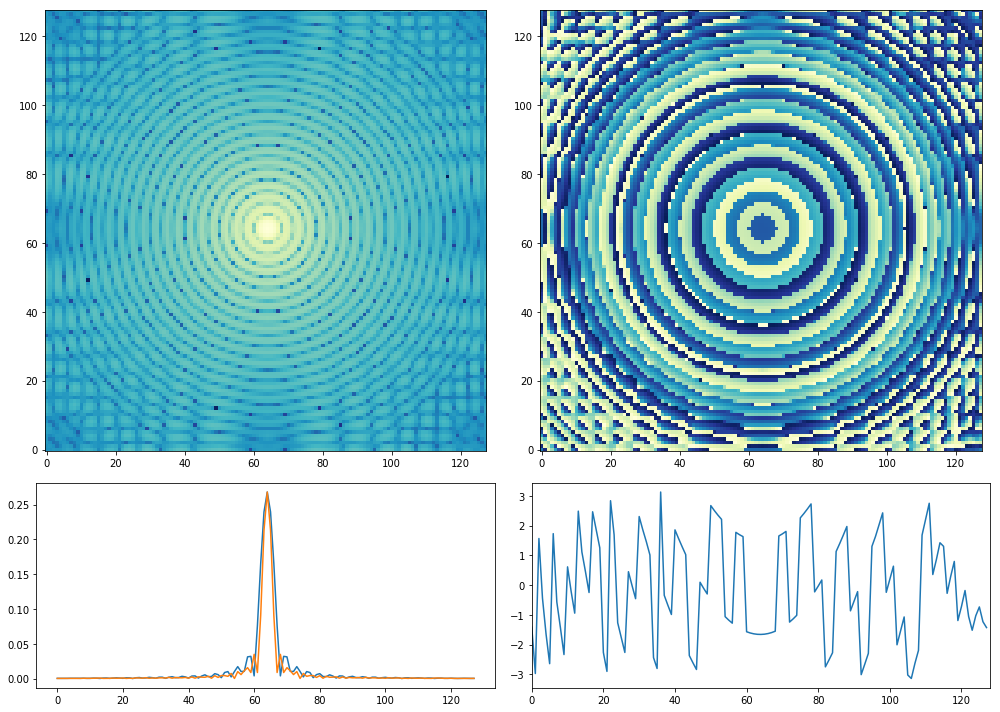

AttributeError: 'FigureManagerBase' object has no attribute 'window'

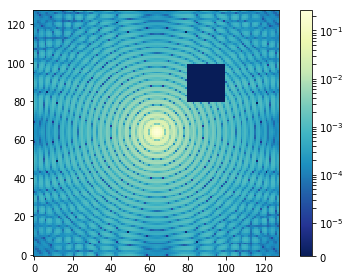

In [2]:
proper.prop_run( 'simple_telescope', 1.1, 128, PHASE_OFFSET = 1 )